In [1]:
df_train = pd.read_csv('../train.csv')
df_test = pd.read_csv('../test.csv')
df = pd.concat([df_train.drop('SalePrice', 1), df_test])

df_train['SalePrice'] = df_train['SalePrice'].apply(lambda x : np.log(x))

tonum = {"ExterQual": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "ExterCond": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "BsmtQual": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "BsmtCond": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "HeatingQC": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "KitchenQual": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "FireplaceQu": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "GarageQual": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "GarageCond": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "PoolQC": {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, np.nan : 0},
         "BsmtFinType1" : {'GLQ' : 6, 'ALQ' : 5, 'BLQ': 4,'Rec' : 3,'LwQ' : 2, 'Unf' : 1, np.nan : 0},
         "BsmtFinType2" : {'GLQ' : 6, 'ALQ' : 5, 'BLQ': 4,'Rec' : 3,'LwQ' : 2, 'Unf' : 1, np.nan : 0},
        }

df= df.replace(tonum)

fill_na_ls = ['GarageType', 'MiscFeature', 'Fence', 'GarageFinish', 'BsmtExposure', 'Alley', 'MasVnrType']

for name in fill_na_ls:
    df[name] = df[name].fillna('N')
    
fill_zero_ls = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'MasVnrArea']

for name in fill_zero_ls:
    df[name] = df[name].fillna(0)
    
fill_mode_ls = ['Electrical', 'Functional', 'MSZoning', 'SaleType', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd']
for name in fill_mode_ls:
    df[name] = df[name].fillna(df[name].mode()[0])

df['TotSF'] = df['1stFlrSF'] + df['TotalBsmtSF'] + df['2ndFlrSF']

df_test = df.iloc[1460:]
df = df.iloc[:1460]
df['SalePrice'] = df_train['SalePrice']

"SalePrice ~ scale(OverallQual) + scale(OverallCond) + scale(GrLivArea) + scale(KitchenQual)+ scale(BsmtFullBath) + scale(GarageCars) + scale(BsmtQual) + scale(YearBuilt) + C(Neighborhood) + C(MSZoning)"

$$ y = OQ + OC + GA + KQ + GC + BQ + YB + Category $$

In [43]:
from patsy import dmatrices
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
cv = KFold(10)
y, X = dmatrices("SalePrice ~ scale(OverallQual) + scale(OverallCond) + scale(GrLivArea) + scale(KitchenQual) + scale(GarageCars) + scale(BsmtQual) + scale(YearBuilt) + C(Neighborhood) + C(MSZoning)", df, return_type = 'dataframe' )
model = LinearRegression().fit(X, y)
cvs = list(cross_val_score(model, X, y, scoring="r2", cv=cv))
print(np.mean(cvs))

0.8611639414474418


$$ y = OQ + OQ^2 + OC + GA + KQ + GC + BQ + YB + Category $$

In [44]:
y, X = dmatrices("SalePrice ~ scale(OverallQual) + scale(I(OverallQual**2)) + scale(OverallCond) + scale(GrLivArea) + scale(KitchenQual)+ scale(GarageCars) + scale(BsmtQual) + scale(YearBuilt) + C(Neighborhood) + C(MSZoning)", df, return_type = 'dataframe' )
model = LinearRegression().fit(X, y)
cvs = list(cross_val_score(model, X, y, scoring="r2", cv=cv))
print(np.mean(cvs))
# origin : 8611639414474418

0.8608755560768608


$$ y = OQ + OQ^2 + OQ^3 + OC + GA + KQ + GC + BQ + YB + Category $$

In [46]:
y, X = dmatrices("SalePrice ~ scale(OverallQual) + scale(I(OverallQual**2)) + scale(I(OverallQual**3)) + scale(OverallCond) + scale(GrLivArea) + scale(KitchenQual)+ scale(GarageCars) + scale(BsmtQual) + scale(YearBuilt) + C(Neighborhood) + C(MSZoning)", df, return_type = 'dataframe' )
model = LinearRegression().fit(X, y)
cvs = list(cross_val_score(model, X, y, scoring="r2", cv=cv))
print(np.mean(cvs))
# origin : 8611639414474418

0.860481481466843


$$ y = OQ + OQ^2 + OQ^3 + OQ^4 + OC + GA + KQ + GC + BQ + YB + Category $$

In [47]:
y, X = dmatrices("SalePrice ~ scale(OverallQual) + scale(I(OverallQual**2)) + scale(I(OverallQual**3)) + scale(I(OverallQual**4)) + scale(OverallCond) + scale(GrLivArea) + scale(KitchenQual) + scale(GarageCars) + scale(BsmtQual) + scale(YearBuilt) + C(Neighborhood) + C(MSZoning)", df, return_type = 'dataframe' )
model = LinearRegression().fit(X, y)
cvs = list(cross_val_score(model, X, y, scoring="r2", cv=cv))
print(np.mean(cvs))
# origin : 8611639414474418

0.8608202595127334


$$ y = OQ + OC + OC^2 + GA + KQ + GC + BQ + YB + Category $$

In [49]:
y, X = dmatrices("SalePrice ~ scale(OverallQual) + scale(OverallCond) + scale(I(OverallCond**2)) + scale(GrLivArea) + scale(KitchenQual) + scale(GarageCars) + scale(BsmtQual) + scale(YearBuilt) + C(Neighborhood) + C(MSZoning)", df, return_type = 'dataframe' )
model = LinearRegression().fit(X, y)
cvs = list(cross_val_score(model, X, y, scoring="r2", cv=cv))
print(np.mean(cvs))
## origin : 8611639414474418

0.8611319452611343


$\Diamond$ $$ y = OQ + OC + GA + GA^2 + KQ + GC + BQ + YB + Category $$

In [50]:
y, X = dmatrices("SalePrice ~ scale(OverallQual) + scale(OverallCond) + scale(GrLivArea) + scale(I(GrLivArea**2)) + scale(KitchenQual) + scale(GarageCars) + scale(BsmtQual) + scale(YearBuilt) + C(Neighborhood) + C(MSZoning)", df, return_type = 'dataframe' )
model = LinearRegression().fit(X, y)
cvs = list(cross_val_score(model, X, y, scoring="r2", cv=cv))
print(np.mean(cvs))
# origin : 8611639414474418

0.8740162661327588


$\Diamond$ $$ y = OQ + OC + GA + GA^2 + GA^3 + KQ + GC + BQ + YB + Category $$

In [51]:
y, X = dmatrices("SalePrice ~ scale(OverallQual) + scale(OverallCond) + scale(GrLivArea) + scale(I(GrLivArea**2)) + scale(I(GrLivArea**3)) + scale(KitchenQual) + scale(GarageCars) + scale(BsmtQual) + scale(YearBuilt) + C(Neighborhood) + C(MSZoning)", df, return_type = 'dataframe' )
model = LinearRegression().fit(X, y)
cvs = list(cross_val_score(model, X, y, scoring="r2", cv=cv))
print(np.mean(cvs))
# origin : 8611639414474418

0.8768850176780474


$$ y = OQ + OC + GA + GA^2 + GA^3 + GA^4 + KQ + GC + BQ + YB + Category $$

In [52]:
y, X = dmatrices("SalePrice ~ scale(OverallQual) + scale(OverallCond) + scale(GrLivArea) + scale(I(GrLivArea**2)) + scale(I(GrLivArea**3)) + scale(I(GrLivArea**4)) + scale(KitchenQual)+ scale(GarageCars) + scale(BsmtQual) + scale(YearBuilt) + C(Neighborhood) + C(MSZoning)", df, return_type = 'dataframe' )
model = LinearRegression().fit(X, y)
cvs = list(cross_val_score(model, X, y, scoring="r2", cv=cv))
print(np.mean(cvs))
# origin : 8611639414474418

0.8256637072573622


 $$ y = OQ + OC + GA + KQ + KQ^2 + GC + BQ + YB + Category $$

In [53]:
y, X = dmatrices("SalePrice ~ scale(OverallQual) + scale(OverallCond) + scale(GrLivArea) + scale(KitchenQual) +scale(I(KitchenQual**2)) + scale(GarageCars) + scale(BsmtQual) + scale(YearBuilt) + C(Neighborhood) + C(MSZoning)", df, return_type = 'dataframe' )
model = LinearRegression().fit(X, y)
cvs = list(cross_val_score(model, X, y, scoring="r2", cv=cv))
print(np.mean(cvs))
# origin : 0.8680159706283339

0.8610964059018753


$\Diamond$ $$ y = OQ + OC + GA + KQ + KQ^2 + KQ^3 + GC + BQ + YB + Category $$

In [54]:
y, X = dmatrices("SalePrice ~ scale(OverallQual) + scale(OverallCond) + scale(GrLivArea) + scale(KitchenQual) + scale(I(KitchenQual**2)) + scale(I(KitchenQual**3)) + scale(GarageCars) + scale(BsmtQual) + scale(YearBuilt) + C(Neighborhood) + C(MSZoning)", df, return_type = 'dataframe' )
model = LinearRegression().fit(X, y)
cvs = list(cross_val_score(model, X, y, scoring="r2", cv=cv))
print(np.mean(cvs))
# origin : 8611639414474418

0.86138566816928


$$ y = OQ + OC + GA + KQ + KQ^2 + KQ^3 + KQ^4 + GC + BQ + YB + Category $$

In [55]:
y, X = dmatrices("SalePrice ~ scale(OverallQual) + scale(OverallCond) + scale(GrLivArea) + scale(KitchenQual) + scale(I(KitchenQual**2)) + scale(I(KitchenQual**3)) + scale(I(KitchenQual**4)) + scale(GarageCars) + scale(BsmtQual) + scale(YearBuilt) + C(Neighborhood) + C(MSZoning)", df, return_type = 'dataframe' )
model = LinearRegression().fit(X, y)
cvs = list(cross_val_score(model, X, y, scoring="r2", cv=cv))
print(np.mean(cvs))
# origin : 8611639414474418

0.8611439344195485


$$ y = OQ + OC + GA + KQ + GC + GC^2 + BQ + YB + Category $$

In [56]:
y, X = dmatrices("SalePrice ~ scale(OverallQual) + scale(OverallCond) + scale(GrLivArea) + scale(KitchenQual) + scale(GarageCars) + scale(I(GarageCars**2))+ scale(BsmtQual) + scale(YearBuilt) + C(Neighborhood) + C(MSZoning)", df, return_type = 'dataframe' )
model = LinearRegression().fit(X, y)
cvs = list(cross_val_score(model, X, y, scoring="r2", cv=cv))
print(np.mean(cvs))
# origin : 8611639414474418

0.860480756638179


$$ y = OQ + OC + GA + KQ + BF + GC + GC^2 + GC^3 + BQ + YB + Category $$

In [57]:
y, X = dmatrices("SalePrice ~ scale(OverallQual) + scale(OverallCond) + scale(GrLivArea) + scale(KitchenQual) + scale(GarageCars) + scale(I(GarageCars**2)) +  scale(I(GarageCars**3)) + scale(BsmtQual) + scale(YearBuilt) + C(Neighborhood) + C(MSZoning)", df, return_type = 'dataframe' )
model = LinearRegression().fit(X, y)
cvs = list(cross_val_score(model, X, y, scoring="r2", cv=cv))
print(np.mean(cvs))
# origin : 8611639414474418

0.8605840506988344


$$ y = OQ + OC + GA + KQ + GC + GC^2 + GC^3 + GC^4 + BQ + YB + Category $$

In [58]:
y, X = dmatrices("SalePrice ~ scale(OverallQual) + scale(OverallCond) + scale(GrLivArea) + scale(KitchenQual) + scale(GarageCars) + scale(I(GarageCars**2)) +  scale(I(GarageCars**3)) + scale(I(GarageCars**4)) +scale(BsmtQual) + scale(YearBuilt) + C(Neighborhood) + C(MSZoning)", df, return_type = 'dataframe' )
model = LinearRegression().fit(X, y)
cvs = list(cross_val_score(model, X, y, scoring="r2", cv=cv))
print(np.mean(cvs))
# origin : 8611639414474418

0.8603540080665549


$$ y = OQ + OC + GA + KQ + GC + BQ + BQ^2 + YB + Category $$

In [59]:
y, X = dmatrices("SalePrice ~ scale(OverallQual) + scale(OverallCond) + scale(GrLivArea) + scale(KitchenQual) + scale(GarageCars) + scale(BsmtQual) + scale(I(BsmtQual**2)) + scale(YearBuilt) + C(Neighborhood) + C(MSZoning)", df, return_type = 'dataframe' )
model = LinearRegression().fit(X, y)
cvs = list(cross_val_score(model, X, y, scoring="r2", cv=cv))
print(np.mean(cvs))
# origin : 8611639414474418

0.8610287607495385


$\Diamond$  $$ y = OQ + OC + GA + KQ + GC + BQ + BQ^2 + BQ^3 + YB + Category $$

In [60]:
y, X = dmatrices("SalePrice ~ scale(OverallQual) + scale(OverallCond) + scale(GrLivArea) + scale(KitchenQual) + scale(GarageCars) + scale(BsmtQual) + scale(I(BsmtQual**2)) + scale(I(BsmtQual**3)) + scale(YearBuilt) + C(Neighborhood) + C(MSZoning)", df, return_type = 'dataframe' )
model = LinearRegression().fit(X, y)
cvs = list(cross_val_score(model, X, y, scoring="r2", cv=cv))
print(np.mean(cvs))
# origin : 8611639414474418

0.8614886615374939


$\Diamond$ $$ y = OQ + OC + GA + KQ + GC + BQ + BQ^2 + BQ^3 + BQ^4 + YB + Category $$

In [61]:
y, X = dmatrices("SalePrice ~ scale(OverallQual) + scale(OverallCond) + scale(GrLivArea) + scale(KitchenQual) + scale(GarageCars) + scale(BsmtQual) + scale(I(BsmtQual**2)) + scale(I(BsmtQual**3)) + scale(I(BsmtQual**4)) + scale(YearBuilt) + C(Neighborhood) + C(MSZoning)", df, return_type = 'dataframe' )
model = LinearRegression().fit(X, y)
cvs = list(cross_val_score(model, X, y, scoring="r2", cv=cv))
print(np.mean(cvs))
# origin : 8611639414474418

0.8613280215623472


$$ y = OQ + OC + GA + KQ + GC + BQ + BQ^2 + BQ^3 + BQ^4 + BQ^5 + YB + Category $$

In [62]:
y, X = dmatrices("SalePrice ~ scale(OverallQual) + scale(OverallCond) + scale(GrLivArea) + scale(KitchenQual) + scale(GarageCars) + scale(BsmtQual) + scale(I(BsmtQual**2)) + scale(I(BsmtQual**3)) + scale(I(BsmtQual**4)) + scale(I(BsmtQual**5)) + scale(YearBuilt) + C(Neighborhood) + C(MSZoning)", df, return_type = 'dataframe' )
model = LinearRegression().fit(X, y)
cvs = list(cross_val_score(model, X, y, scoring="r2", cv=cv))
print(np.mean(cvs))
# origin : 8611639414474418

0.8609262450442665


$$ y = OQ + OC + GA + KQ + GC + BQ + YB + YB^2 + Category $$

In [63]:
y, X = dmatrices("SalePrice ~ scale(OverallQual) + scale(OverallCond) + scale(GrLivArea) + scale(KitchenQual) + scale(GarageCars) + scale(BsmtQual) + scale(YearBuilt) + scale(I(YearBuilt**2)) + C(Neighborhood) + C(MSZoning)", df, return_type = 'dataframe' )
model = LinearRegression().fit(X, y)
cvs = list(cross_val_score(model, X, y, scoring="r2", cv=cv))
print(np.mean(cvs))
# origin : 8611639414474418


0.8610769176884572


$$ y = OQ + OC + GA + KQ + GC + BQ + YB + YB^2 + YB^3 + Category $$

In [64]:
y, X = dmatrices("SalePrice ~ scale(OverallQual) + scale(OverallCond) + scale(GrLivArea) + scale(KitchenQual) + scale(GarageCars) + scale(BsmtQual) + scale(YearBuilt) + scale(I(YearBuilt**2)) + scale(I(YearBuilt**3)) + C(Neighborhood) + C(MSZoning)", df, return_type = 'dataframe' )
model = LinearRegression().fit(X, y)
cvs = list(cross_val_score(model, X, y, scoring="r2", cv=cv))
print(np.mean(cvs))
# origin : 8611639414474418

0.860927429458361


In [65]:
import statsmodels.api as sm

model_a = sm.OLS.from_formula("SalePrice ~ scale(OverallQual) + scale(OverallCond) + scale(GrLivArea) + scale(I(GrLivArea**2)) + scale(I(GrLivArea**3)) + scale(KitchenQual) + scale(GarageCars) + scale(BsmtQual) + scale(YearBuilt) + C(Neighborhood) + C(MSZoning)", data=df)
result_a = model_a.fit()

In [69]:
# 아웃라이어 제거
influence = result_a.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (1460 - 1 - 38)
idx = np.where(cooks_d2 > fox_cr)[0]
idx = list(set(idx) - set([599, 956]))
df_fin = df.copy()
df_fin = df_fin.drop(df_fin.index[idx])


model_firstfin = sm.OLS.from_formula("SalePrice ~ scale(OverallQual) + scale(OverallCond) + scale(GrLivArea) + scale(I(GrLivArea**2)) + scale(I(GrLivArea**3)) + scale(KitchenQual) + scale(GarageCars) + scale(BsmtQual) + scale(YearBuilt) + C(Neighborhood) + C(MSZoning)", data=df_fin)
result_firstfin = model_firstfin.fit()
print(result_firstfin.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     413.7
Date:                Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                        22:01:29   Log-Likelihood:                 1156.3
No. Observations:                1363   AIC:                            -2237.
Df Residuals:                    1325   BIC:                            -2038.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [70]:
pre = pd.DataFrame(result_firstfin.predict(df_test))
pre['Id']=pre.index
pre = pre.rename(columns={0: 'SalePrice'})
pre['Id'] = range(1461,2920)
pre['SalePrice'] = pre['SalePrice'].apply(lambda x : np.exp(x))
pre.to_csv('submission.csv', index=False)

rmse : 0.14176

$\Diamond$ $$ y = OQ + OC + GA + GA^2 + GA^3 + KQ +KQ^2 +KQ^3 + GC + BQ + YB + Category $$

In [71]:
y, X = dmatrices("SalePrice ~ scale(OverallQual) + scale(OverallCond) + scale(GrLivArea) + scale(I(GrLivArea**2)) + scale(I(GrLivArea**3)) + scale(KitchenQual) + scale(I(KitchenQual**2)) + scale(I(KitchenQual**3))  + scale(GarageCars) + scale(BsmtQual) + scale(YearBuilt) + C(Neighborhood) + C(MSZoning)", df, return_type = 'dataframe' )
model = LinearRegression().fit(X, y)
cvs = list(cross_val_score(model, X, y, scoring="r2", cv=cv))
print(np.mean(cvs))
# origin : 8611639414474418
# GAorigin : 0.8768850176780474
# KQorigin : 0.86138566816928


0.8785461600496355


In [74]:
import statsmodels.api as sm

model_a = sm.OLS.from_formula("SalePrice ~ scale(OverallQual) + scale(OverallCond) + scale(GrLivArea) + scale(I(GrLivArea**2)) + scale(I(GrLivArea**3)) + scale(KitchenQual) + scale(I(KitchenQual**2)) + scale(I(KitchenQual**3)) + scale(GarageCars) + scale(BsmtQual) + scale(YearBuilt) + C(Neighborhood) + C(MSZoning)", data=df)
result_a = model_a.fit()
# 아웃라이어 제거
influence = result_a.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (1460 - 1 - 38)
idx = np.where(cooks_d2 > fox_cr)[0]
idx = list(set(idx) - set([599, 956]))
df_fin = df.copy()
df_fin = df_fin.drop(df_fin.index[idx])


model_firstfin = sm.OLS.from_formula("SalePrice ~ scale(OverallQual) + scale(OverallCond) + scale(GrLivArea) + scale(I(GrLivArea**2)) + scale(I(GrLivArea**3)) + scale(KitchenQual) + scale(I(KitchenQual**2)) + scale(I(KitchenQual**3)) + scale(GarageCars) + scale(BsmtQual) + scale(YearBuilt) + C(Neighborhood) + C(MSZoning)", data=df_fin)
result_firstfin = model_firstfin.fit()
print(result_firstfin.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     402.0
Date:                Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                        22:03:03   Log-Likelihood:                 1171.7
No. Observations:                1366   AIC:                            -2263.
Df Residuals:                    1326   BIC:                            -2055.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [75]:
pre = pd.DataFrame(result_firstfin.predict(df_test))
pre['Id']=pre.index
pre = pre.rename(columns={0: 'SalePrice'})
pre['Id'] = range(1461,2920)
pre['SalePrice'] = pre['SalePrice'].apply(lambda x : np.exp(x))
pre.to_csv('submission.csv', index=False)

rmse : 0.14355

$\Diamond$ $$ y = OQ + OC + GA + GA^2 + GA^3 + KQ + GC + BQ + BQ^2 + BQ^3 + YB + Category $$

In [76]:
y, X = dmatrices("SalePrice ~ scale(OverallQual) + scale(OverallCond) + scale(GrLivArea) + scale(I(GrLivArea**2)) + scale(I(GrLivArea**3)) + scale(KitchenQual) + scale(GarageCars) + scale(I(BsmtQual**2)) + scale((BsmtQual**3)) + scale(I(BsmtQual**4)) + scale(BsmtQual) + scale(YearBuilt) + C(Neighborhood) + C(MSZoning)", df, return_type = 'dataframe' )
model = LinearRegression().fit(X, y)
cvs = list(cross_val_score(model, X, y, scoring="r2", cv=cv))
print(np.mean(cvs))
# origin : 8611639414474418
# GAorigin : 0.8768850176780474
# KQorigin : 0.86138566816928


0.8782115148850039


In [78]:
import statsmodels.api as sm

model_a = sm.OLS.from_formula("SalePrice ~ scale(OverallQual) + scale(OverallCond) + scale(GrLivArea) + scale(I(GrLivArea**2)) + scale(I(GrLivArea**3)) + scale(KitchenQual) + scale(GarageCars) + scale(I(BsmtQual**2)) + scale(I(BsmtQual**3)) + scale(BsmtQual) + scale(YearBuilt) + C(Neighborhood) + C(MSZoning)", data=df)
result_a = model_a.fit()
# 아웃라이어 제거
influence = result_a.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (1460 - 1 - 38)
idx = np.where(cooks_d2 > fox_cr)[0]
df_fin = df.copy()
df_fin = df_fin.drop(df_fin.index[idx])


model_firstfin = sm.OLS.from_formula("SalePrice ~ scale(OverallQual) + scale(OverallCond) + scale(GrLivArea) + scale(I(GrLivArea**2)) + scale(I(GrLivArea**3)) + scale(KitchenQual) + scale(GarageCars) + scale(I(BsmtQual**2)) + scale(I(BsmtQual**3)) + scale(BsmtQual) + scale(YearBuilt) + C(Neighborhood) + C(MSZoning)", data=df_fin)
result_firstfin = model_firstfin.fit()
print(result_firstfin.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     410.3
Date:                Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                        22:03:41   Log-Likelihood:                 1163.1
No. Observations:                1363   AIC:                            -2248.
Df Residuals:                    1324   BIC:                            -2045.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

#### 교차검증 결과 최고 스코어 : $ y = OQ + OC + GA + GA^2 + GA^3 + KQ  + GC + BQ + YB + Category $

In [79]:
import statsmodels.api as sm

model_a = sm.OLS.from_formula("SalePrice ~ scale(OverallQual) + scale(OverallCond) + scale(GrLivArea) + scale(I(GrLivArea**2)) + scale(I(GrLivArea**3)) + scale(KitchenQual) + scale(GarageCars) + scale(BsmtQual) + scale(YearBuilt) + C(Neighborhood) + C(MSZoning)", data=df)
result_a = model_a.fit()
# 아웃라이어 제거
influence = result_a.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (1460 - 1 - 38)
idx = np.where(cooks_d2 > fox_cr)[0]
idx = list(set(idx) - set([599, 956]))
df_fin = df.copy()
df_fin = df_fin.drop(df_fin.index[idx])


model_firstfin = sm.OLS.from_formula("SalePrice ~ scale(OverallQual) + scale(OverallCond) + scale(GrLivArea) + scale(I(GrLivArea**2)) + scale(I(GrLivArea**3)) + scale(KitchenQual) + scale(GarageCars) + scale(BsmtQual) + scale(YearBuilt) + C(Neighborhood) + C(MSZoning)", data=df_fin)
result_firstfin = model_firstfin.fit()
print(result_firstfin.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     413.7
Date:                Wed, 14 Mar 2018   Prob (F-statistic):               0.00
Time:                        22:04:05   Log-Likelihood:                 1156.3
No. Observations:                1363   AIC:                            -2237.
Df Residuals:                    1325   BIC:                            -2038.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

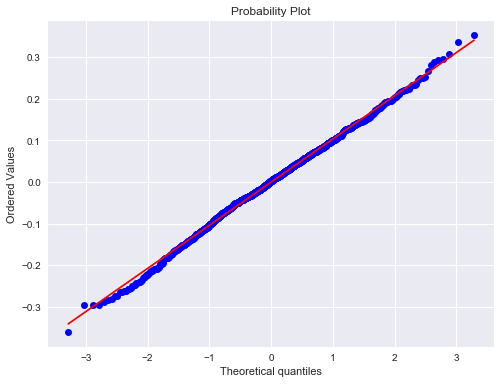

Chi^2       :  4.376
P-value     :  0.112


In [80]:
import scipy as sp
import statsmodels.stats.api as sms
plt.figure(figsize=(8, 6))
sp.stats.probplot(result_firstfin.resid, plot=plt)
plt.show()
#잔차 정규성 P-value
test = sms.omni_normtest(result_firstfin.resid)
for xi in zip(['Chi^2', 'P-value'], test):
    print("%-12s: %6.3f" % xi)

In [ ]:
pre = pd.DataFrame(result_a2.predict(df_test))
pre['Id']=pre.index
pre = pre.rename(columns={0: 'SalePrice'})
pre['Id'] = range(1461,2920)
pre['SalePrice'] = pre['SalePrice'].apply(lambda x : np.exp(x))
pre.to_csv('submission.csv', index=False)

In [ ]:
pre = pd.DataFrame(result_b2.predict(df_test))
pre['Id']=pre.index
pre = pre.rename(columns={0: 'SalePrice'})
pre['Id'] = range(1461,2920)
pre['SalePrice'] = pre['SalePrice'].apply(lambda x : np.exp(x))
pre.to_csv('submission.csv', index=False)